In this notebook, we will take the IDWT of LL, LH, HL, and HH test outputs and create a folder in . that will contain these images. We plan to evaluate these images.

In [2]:
# first, we need to get the directories where these images are saved.

LL_dict = './output/LL_bior/epoch-4-test/png'
LH_dict = './output/LH_bior/epoch-4-test/png'
HL_dict = './output/HL_bior/epoch-4-test/png'
HH_dict = './output/HH_bior/epoch-4-test/png'

In [3]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [4]:
import os
import matplotlib.pyplot as plt
import pywt
import pywt.data
import numpy as np
import cv2
import scipy.io as sio

In [5]:
gen_names = [i for i in os.walk(LH_dict)]

In [6]:
# def dk(u, v, uk, vk):
#     return np.sqrt(((u - uk)**2 + (v - vk)**2))

In [7]:
# def d_neg_k(u, v, uk, vk):
#     return np.sqrt(((u + uk)**2 + (v + vk)**2))

In [8]:
# def hnr_term(D_0, n, uk, vk, u, v):
    
#     hnr = (1/(1+((D_0/dk(u,v,uk,vk))**(2*n))))*(1/(1+((D_0/d_neg_k(u,v,uk,vk))**(2*n))))
    
#     return(hnr)

In [9]:
# def notch_filter_image(image):
#     num_rows = image.shape[0]
#     num_cols = image.shape[1]
    
#     # all images have the same problem
#     notch_reject_locations = [[num_rows//2,num_cols], [num_rows,num_cols//2], [0,num_cols]]       
    
#     # create grid
    
#     x_axis = np.linspace(-num_cols//2,num_cols//2,num_cols)
#     y_axis = np.linspace(-num_rows//2,num_rows//2,num_cols)
#     [u,v] = np.meshgrid(x_axis,y_axis)
    
    
#     hpnr = 1

#     for i in range(len(notch_reject_locations)):

#         uk = notch_reject_locations[i][0] - num_cols//2
#         vk = notch_reject_locations[i][1] - num_rows//2
#         n = 4
#         D_0 = 15
#         hpnr = hpnr * hnr_term(D_0, n, uk, vk, u, v)
        
#     plt.imshow(hpnr)

In [10]:
# for i in range(len(notch_reject_locations)):
    
#     uk = notch_reject_locations[i][0] - 256
#     vk = notch_reject_locations[i][1] - 256
#     n = 4
#     D_0 = 15
#     hnr_car = hnr_car * hnr_term(D_0, n, uk, vk)

In [22]:
for i in range(len(gen_names[0][2])):
#     if(i == 0):

############################## Reshaping Algorithm ###############################################################

    # retrieve shape of og image that we took DWT of

    path_og = './data/HED-BSDS/test'
    path_to_og_image = './data/HED-BSDS/test/' + gen_names[0][2][i][:-4] + '.jpg'
#     print(path_to_og_image)

    # read the image

    og_image = plt.imread(path_to_og_image)

    # plot the image to see if everything is fine

#     plt.imshow(og_image)

    # print its size

#     print(og_image.shape)

    width = og_image.shape[1]
    height = og_image.shape[0]

    dim = (width, height)
    
#     print(dim)
    
#     print(gen_names[0][2][i])
    
#     print(og_image.shape)



################################################################################################################

################################### Reading DWT + net output images ############################################

    temp_img_LL = plt.imread(os.path.join(LL_dict, gen_names[0][2][i]))
    temp_img_LH = plt.imread(os.path.join(LH_dict, gen_names[0][2][i]))
    temp_img_HL = plt.imread(os.path.join(HL_dict, gen_names[0][2][i]))
    temp_img_HH = plt.imread(os.path.join(HH_dict, gen_names[0][2][i]))

################################################################################################################


################################## Taking the IDWT #############################################################

    idwt_image = pywt.idwt2((temp_img_LL, (temp_img_LH, temp_img_HL, temp_img_HH)), 'bior4.4')

################################################################################################################


################################# Reshaping the IDWT according to og shape #####################################

    # we use bicubic interpolation
    idwt_image = cv2.resize(idwt_image, dim, cv2.INTER_CUBIC)

################################################################################################################


##################################### OLD CODE TO DENOISE USING NOTCH REJECT ###################################

#         plt.imshow(idwt_image, cmap = 'gray')
    # we see that this image is corrupted by a certain very high frequency noise. We should remove it?
    # maybe step one is evaluating with removal, and step 2 is evaluating with removal.
    # right now I think we should do step 2 first
#         fft = np.fft.fft2(idwt_image)
#         fft_image_shift = np.fft.fftshift(fft)
#         mag = 20*np.log(np.abs(fft_image_shift))
#         plt.figure()
#         plt.imshow(mag)
#         notch_filter_image(idwt_image)
    # maybe we should try a notch reject filter

################################################################################################################


#################################### Using a bilateral filter to blur noisy IDWT image #########################


#     blur = cv2.bilateralFilter(idwt_image,9,75,75) # https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#     blur = cv2.bilateralFilter(blur,9,75,75) # https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html


#################################### Image saving after figuring out path ################################################

    file_name_1 = os.path.join('./recombined_no_filter_bior', gen_names[0][2][i])
#     file_name_2 = os.path.join('./recombined_yes_filter_bior', gen_names[0][2][i])

    mat_file_name_1 = os.path.join('./recombined_no_filter_mat_bior', gen_names[0][2][i][:-4]+'.mat')
#     mat_file_name_2 = os.path.join('./recombined_yes_filter_mat_bior', gen_names[0][2][i][:-4]+'.mat')

    plt.imsave(file_name_1, idwt_image, cmap = 'gray')
#     plt.imsave(file_name_2, blur, cmap = 'gray')

    fuse1 = idwt_image
#     fuse2 = blur

    sio.savemat(mat_file_name_1, {'result': fuse1})
#     sio.savemat(mat_file_name_2, {'result': fuse2})

##########################################################################################################################


(481, 321)
5096.png
(321, 481, 3)
(481, 321)
183066.png
(321, 481, 3)
(481, 321)
196088.png
(321, 481, 3)
(321, 481)
267036.png
(481, 321, 3)
(481, 321)
49024.png
(321, 481, 3)
(481, 321)
108004.png
(321, 481, 3)
(321, 481)
140088.png
(481, 321, 3)
(481, 321)
326025.png
(321, 481, 3)
(481, 321)
106047.png
(321, 481, 3)
(481, 321)
277053.png
(321, 481, 3)
(481, 321)
87015.png
(321, 481, 3)
(481, 321)
108036.png
(321, 481, 3)
(481, 321)
196062.png
(321, 481, 3)
(321, 481)
388006.png
(481, 321, 3)
(481, 321)
51084.png
(321, 481, 3)
(481, 321)
120093.png
(321, 481, 3)
(481, 321)
185092.png
(321, 481, 3)
(481, 321)
77062.png
(321, 481, 3)
(481, 321)
112056.png
(321, 481, 3)
(481, 321)
296028.png
(321, 481, 3)
(321, 481)
230063.png
(481, 321, 3)
(481, 321)
217090.png
(321, 481, 3)
(481, 321)
368037.png
(321, 481, 3)
(481, 321)
253016.png
(321, 481, 3)
(321, 481)
23050.png
(481, 321, 3)
(481, 321)
105027.png
(321, 481, 3)
(481, 321)
189096.png
(321, 481, 3)
(321, 481)
80090.png
(481, 321, 3)


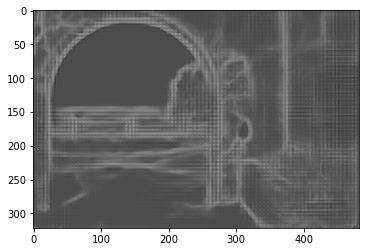

In [14]:
plt.imshow(idwt_image, cmap = 'gray')

(array([[  0.,   0., 102., ...,   6.,   2.,   0.],
        [  0.,  11., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 110., ...,   6.,   3.,   0.],
        ...,
        [  0.,  69., 207., ...,   0.,   0.,   0.],
        [  0.,   0.,  63., ...,   0.,   0.,   0.],
        [  0.,  68., 207., ...,   0.,   0.,   0.]]),
 array([-0.75686276, -0.50333333, -0.24980393,  0.00372549,  0.2572549 ,
         0.5107843 ,  0.76431376,  1.0178431 ,  1.2713726 ,  1.524902  ,
         1.7784314 ], dtype=float32),
 <a list of 482 Lists of Patches objects>)

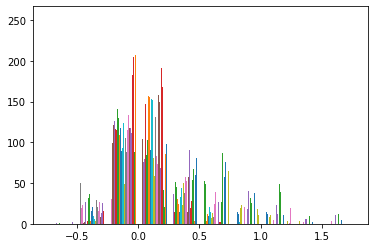

In [15]:
plt.hist(idwt_image)

References:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html

https://docs.opencv.org/master/de/dbc/tutorial_py_fourier_transform.html

In [ ]:
gen_names[0][2][i][:-4]